In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
import matplotlib.pyplot as plt

In [6]:
head = ["age",
     "workclass",
     "fnlwgt",
     "education",
     "education-num",
     "marital-status",
     "occupation",
     "relationship",
     "race",
     "sex",
     "capital-gain",
     "capital-loss",
     "hours-per-week",
     "native-country",
     "income"]

train_features = ["age",
     "workclass",
     "fnlwgt",
     "education",
     "education-num",
     "marital-status",
     "occupation",
     "relationship",
     "race",
     "sex",
     "capital-gain",
     "capital-loss",
     "hours-per-week",
     "native-country"]

In [7]:
file_train = pd.read_csv("train.csv",header=None,names = head)
file_test = pd.read_csv("test.csv",header=None, names = head)

In [8]:
X_train = file_train[train_features]
Y_train = file_train[["income"]]
temp_train = file_train.income

X_test = file_test[train_features]
Y_test = file_test[["income"]]
temp_test = file_test.income


In [9]:
enc = OneHotEncoder()

X_train_transformed = pd.DataFrame(enc.fit_transform(X_train[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]).toarray())
X_test_transformed = pd.DataFrame(enc.transform(X_test[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]).toarray())

X_train_2 =  X_train[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]
X_test_2 =  X_test[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]

In [10]:
#Normalization of data

# X_train_2 = (X_train_2-X_train_2.mean())/X_train_2.std()
X_train_2 = (X_train_2 - X_train_2.min())/(X_train_2.max() - X_train_2.min())


# X_test_2 = (X_test_2-X_test_2.mean())/X_test_2.std()
X_test_2 = (X_test_2 - X_test_2.min())/(X_test_2.max() - X_test_2.min())

In [11]:
X_train = pd.concat([X_train_transformed, X_train_2], axis=1)
X_test  = pd.concat([X_test_transformed, X_test_2], axis=1)

In [12]:
#since using a column matrix fit and transform was used again and again
enc_ordinal = OrdinalEncoder()

Y_train = pd.DataFrame(enc_ordinal.fit_transform(Y_train)).astype(int)
Y_test  = pd.DataFrame(enc_ordinal.fit_transform(Y_test)).astype(int)

In [29]:
import seaborn as sns
# f, ax = plt.subplots(figsize=(25, 25))
# ax = sns.heatmap(X_train.corr())
cor = np.array(X_train.corr())

In [42]:
lis = []
for i in enc.categories_ :
    lis.extend(i)

In [55]:
len(lis)

98

In [49]:
# f, ax = plt.subplots(figsize=(25, 25))
# ax = sns.heatmap(cor[])
cor = np.array(X_train.corr())
for i in range(len(cor)):
    for j in range(len(cor[i])):
        if(cor[i][j]<0.6 and cor[i][j]!= 1):
            print(i,j," : ",cor[i][j])

0 1  :  -0.048728034306500224
0 2  :  -0.3021943787068518
0 3  :  -0.03451980884039952
0 4  :  -0.053995387449837326
0 5  :  -0.03780395993910577
0 6  :  -0.003871309886873481
0 7  :  -0.02300343174151026
0 8  :  -0.02472188211463373
0 9  :  -0.011637560891634091
0 10  :  -0.012742992056421881
0 11  :  -0.01567997589181085
0 12  :  -0.021811529309994426
0 13  :  -0.017544314379540717
0 14  :  0.024893722643011592
0 15  :  -0.0026785535924146145
0 16  :  0.025168344352390744
0 17  :  0.0056319836499062765
0 18  :  -0.019359203043412147
0 19  :  0.011918250647942608
0 20  :  -0.00694422165153356
0 21  :  0.012985257031832198
0 22  :  0.01937027131825384
0 23  :  0.018821335092120507
0 24  :  0.016925362444343624
0 25  :  0.008502504018730404
0 26  :  -0.0009828051917754636
0 27  :  -0.026116765242291177
0 28  :  -0.004779702642692816
0 29  :  0.011834391825833464
0 30  :  0.11566562238961368
0 31  :  0.09616849481233355
0 32  :  -0.03527324643054372
0 33  :  0.030465649138154933
0 34  : 

6 0  :  -0.003871309886873481
6 1  :  -0.0058450803368718125
6 2  :  -0.03624916223344259
6 3  :  -0.004140759190420153
6 4  :  -0.006476915844374326
6 5  :  -0.004534703401045456
6 7  :  -0.0036024406482058863
6 8  :  -0.004088504377011598
6 9  :  -0.002424413186118705
6 10  :  -0.0015285618096837594
6 11  :  -0.0021158472926157885
6 12  :  0.00847707610488023
6 13  :  -0.0026669266103863253
6 14  :  0.0045572455005736855
6 15  :  -0.004586295348422743
6 16  :  -0.009656723032295304
6 17  :  -0.0024178926534577827
6 18  :  0.01455294428875678
6 19  :  -0.005145642414685228
6 20  :  -0.0008329811372022423
6 21  :  -0.002915022294924112
6 22  :  -0.0003694761945322671
6 23  :  -0.008684205373016634
6 24  :  -0.0005688078526781467
6 25  :  0.004540570230102713
6 26  :  0.011581991482108278
6 27  :  -0.0016940312602066587
6 28  :  -0.00386282613997395
6 29  :  0.00580764584145887
6 30  :  0.00595770085275406
6 31  :  -0.00037229804477242775
6 32  :  -0.00393848798592071
6 33  :  -0.008416

10 2  :  0.022918007034022504
10 3  :  -0.011094957224888801
10 4  :  -0.0008703626166105702
10 5  :  -0.012595474744335597
10 6  :  -0.0015285618096837594
10 7  :  -0.011857968983444912
10 8  :  -0.01345792001193219
10 9  :  -0.007980316449726192
10 11  :  -0.006964625935486447
10 12  :  -0.00972956234100791
10 13  :  -0.008778585441180702
10 14  :  -0.013189533387026475
10 15  :  -0.015096473002990458
10 16  :  -0.03178653956607181
10 17  :  -0.007958853147041879
10 18  :  -0.04935856965382185
10 19  :  -0.016937647032047917
10 20  :  -0.0027418812558814426
10 21  :  -0.009595229272255994
10 22  :  -0.037825563949338455
10 23  :  -0.017745529741242896
10 24  :  -0.001872315614126096
10 25  :  0.0024354812907110245
10 26  :  0.034770755548253054
10 27  :  -0.011749731262346862
10 28  :  0.006218580350856801
10 29  :  0.034116356473911126
10 30  :  -0.02660964846169413
10 31  :  -0.0012254743654706542
10 32  :  0.003899883646385698
10 33  :  -0.023545266344775988
10 34  :  0.0344201146

14 64  :  -0.0043063498698913474
14 65  :  0.007354759151033247
14 66  :  0.01293900896279088
14 67  :  0.0020496824637335188
14 68  :  -0.005768448298531746
14 69  :  -0.008506980407421708
14 70  :  0.002950199663611355
14 71  :  -0.0010706766292962208
14 72  :  -0.003709609167183286
14 73  :  0.002683724561948465
14 74  :  0.0050262100852658
14 75  :  -0.0010973340388892327
14 76  :  0.012843897935133625
14 77  :  0.0012948878480417167
14 78  :  0.0028294528110631143
14 79  :  0.01551718206948469
14 80  :  -0.0040570053698643724
14 81  :  0.003356600293949311
14 82  :  -0.02278347772778457
14 83  :  -0.0005738694743197658
14 84  :  -0.004006968754148328
14 85  :  -1.513354439846351e-05
14 86  :  -0.003006858633918788
14 87  :  0.00483575345768345
14 88  :  -0.0007490966782094298
14 89  :  -0.005049979597166584
14 90  :  -0.0035516214771369025
14 91  :  -0.009032169006574792
14 92  :  -0.0019966494721374997
14 93  :  0.003356600293948862
14 94  :  0.0030096511953619995
14 95  :  0.012

18 95  :  0.05890825325652642
18 96  :  -0.007498489872406356
18 97  :  -0.006817433596557077
18 98  :  0.01075752984753979
18 99  :  -0.0026972271329062346
18 100  :  -0.3059909055976379
18 101  :  -0.047223587737446865
18 102  :  -0.030262086878208045
18 103  :  0.006437881013475141
19 0  :  0.011918250647942608
19 1  :  0.13041047383626117
19 2  :  -0.11331918809034364
19 3  :  0.015100226335619459
19 4  :  -0.00788026474915348
19 5  :  0.07065275464517794
19 6  :  -0.005145642414685228
19 7  :  -0.03991782848858773
19 8  :  -0.04530379052256882
19 9  :  -0.026864373129138527
19 10  :  -0.016937647032047917
19 11  :  -0.023445224386068823
19 12  :  -0.03275291083488622
19 13  :  -0.02955160942847112
19 14  :  -0.0444003127620661
19 15  :  -0.05081969947446146
19 16  :  -0.10700395965073876
19 17  :  -0.02679212058433125
19 18  :  -0.16615719948617919
19 20  :  -0.009230075222933015
19 21  :  -0.03230070148888098
19 22  :  -0.12733330440664095
19 23  :  0.0007146715104570219
19 24  :

22 53  :  -0.00654412030288329
22 54  :  -0.008436135952763952
22 55  :  0.0582065688070875
22 56  :  -0.0582065688070875
22 57  :  4.813234642406622e-05
22 58  :  -0.0022701647215077757
22 59  :  -0.021981129089093863
22 60  :  -0.006304293853836287
22 61  :  -0.004878854505058878
22 62  :  -0.011591706727578473
22 63  :  0.0027290948326227113
22 64  :  -0.011308107357765966
22 65  :  -0.01353934079060013
22 66  :  -0.010621586097303758
22 67  :  0.004496227288851965
22 68  :  -0.003660510595601904
22 69  :  -0.013902361353319122
22 70  :  0.003642560591076616
22 71  :  0.010797916385910697
22 72  :  0.0013740319308359835
22 73  :  -0.01020556392569402
22 74  :  -0.0033788163187921452
22 75  :  -0.01686461541578289
22 76  :  -0.0027816536849168704
22 77  :  -0.009384303172361129
22 78  :  -0.01187912062367184
22 79  :  0.00820946726864624
22 80  :  -0.0055353772159695246
22 81  :  0.0007944391193964118
22 82  :  -0.042010403764259845
22 83  :  0.004090970279172693
22 84  :  0.01075242

26 53  :  0.038579110381898964
26 54  :  -0.04955314403221944
26 55  :  0.044398007764411926
26 56  :  -0.044398007764411926
26 57  :  0.00960986832853858
26 58  :  0.0034824280117852417
26 59  :  0.032806190001859435
26 60  :  0.0301767649317974
26 61  :  0.010221669907933873
26 62  :  0.058718896572724305
26 63  :  0.006735669785263753
26 64  :  0.01977064310637773
26 65  :  -0.00595923099245547
26 66  :  0.006735669785262974
26 67  :  0.001991483706940864
26 68  :  -0.0034572345583718995
26 69  :  0.041082237162302096
26 70  :  0.028147054352100014
26 71  :  -0.0006416942741058916
26 72  :  0.027983530842312084
26 73  :  -0.0027979155121375396
26 74  :  -0.002314122008095848
26 75  :  0.04072915773157173
26 76  :  0.00391565084233146
26 77  :  0.007537006885833459
26 78  :  0.007403774197262482
26 79  :  0.035245927093843596
26 80  :  0.0018830752463859016
26 81  :  0.010043983933062509
26 82  :  0.0631574225670081
26 83  :  -0.003688210021982671
26 84  :  -0.0024015177278574667
26 

32 79  :  -0.008883788387403937
32 80  :  -0.0019475977460620309
32 81  :  0.0029914220723495396
32 82  :  0.012804397768260842
32 83  :  -0.0012061390143957198
32 84  :  0.0005855684780641087
32 85  :  -0.006208506465300578
32 86  :  -0.013766916453979587
32 87  :  0.010226375688012084
32 88  :  0.021655705692901806
32 89  :  -0.0009153854379877931
32 90  :  -0.00750087072388235
32 91  :  -0.002988967239218495
32 92  :  -0.009438010315104673
32 93  :  -0.005220015181576227
32 94  :  -0.0016160451237029637
32 95  :  0.0034857338110384213
32 96  :  0.007303581767532816
32 97  :  -0.0005831252567640526
32 98  :  0.016108688420567105
32 99  :  0.009308728275984843
32 100  :  -0.15453537369346454
32 101  :  -0.02303457435736643
32 102  :  -0.0018082183941065038
32 103  :  0.04480379317457736
33 0  :  0.030465649138154933
33 1  :  -0.02384284540930184
33 2  :  -0.06739957414837211
33 3  :  0.128218052745613
33 4  :  0.018545425006682447
33 5  :  0.008118775460543532
33 6  :  -0.008416434918

36 21  :  -0.03571947951658535
36 22  :  -0.04149807961962824
36 23  :  0.0001262094987303751
36 24  :  -0.006969936551770529
36 25  :  0.01406062244198576
36 26  :  -0.0001428842947365527
36 27  :  -0.020675859867319273
36 28  :  0.017628423565801157
36 29  :  -0.0015668203235425196
36 30  :  -0.09905785116773383
36 31  :  -0.004561986509490025
36 32  :  -0.10369652529354254
36 33  :  -0.10313151813778051
36 34  :  -0.04861895338457938
36 35  :  -0.057158153049519364
36 37  :  -0.09116043509634908
36 38  :  -0.01822501582605788
36 39  :  -0.10381529097842078
36 40  :  -0.039002951707382896
36 41  :  -0.09696630746951632
36 42  :  -0.046626464916746595
36 43  :  -0.061918039795107065
36 44  :  0.015450726223815785
36 45  :  -0.01525909098390466
36 46  :  0.014336996769155197
36 47  :  -0.012139101767603466
36 48  :  0.007244281290668902
36 49  :  -0.006144962410214287
36 50  :  0.0004963344536336494
36 51  :  -0.006599333142754688
36 52  :  0.03941117439993918
36 53  :  0.0368882909690

40 34  :  -0.027196127544891025
40 35  :  -0.031972724880969555
40 36  :  -0.039002951707382896
40 37  :  -0.050992681811077224
40 38  :  -0.010194580927981065
40 39  :  -0.05807146592043594
40 41  :  -0.05424032978740231
40 42  :  -0.026081583386044393
40 43  :  -0.034635276787586225
40 44  :  0.04746278788870303
40 45  :  -0.013115355452694896
40 46  :  -0.009467378217083936
40 47  :  -0.009916022947090757
40 48  :  -0.023481559435617475
40 49  :  -0.025045092186010046
40 50  :  0.004481224782854301
40 51  :  -0.0069063635727411405
40 52  :  0.029836224526656473
40 53  :  0.00017846482402115063
40 54  :  -0.02292563145344609
40 55  :  -0.06509522102311416
40 56  :  0.06509522102311416
40 57  :  -0.003609402222950781
40 58  :  -0.0010978754052780918
40 59  :  -0.007021242411631135
40 60  :  -0.006370403690753537
40 61  :  0.00014837654211817138
40 62  :  -0.0020975118615682246
40 63  :  -0.00442125693106403
40 64  :  -0.008519037583784125
40 65  :  0.00500594645891916
40 66  :  0.0032

46 12  :  0.01977686988176391
46 13  :  0.025070662033637267
46 14  :  -0.02149721386799966
46 15  :  -0.01590777632071938
46 16  :  -0.03501960345491617
46 17  :  -0.016015122243079112
46 18  :  0.026748493059807366
46 19  :  -0.03380261707873408
46 20  :  0.01357907125883576
46 21  :  -0.01767091551852132
46 22  :  -0.007473204529884669
46 23  :  -0.011989403782210886
46 24  :  0.002831786023889369
46 25  :  -0.11652991693453968
46 26  :  0.026880992015401554
46 27  :  0.10959905249991381
46 28  :  0.02858304485822518
46 29  :  0.018756247170278958
46 30  :  0.012116346115911713
46 31  :  0.019688907624545383
46 32  :  -0.011972958738711853
46 33  :  -0.04087499028196746
46 34  :  0.0020364267503557563
46 35  :  0.046652426813825705
46 36  :  0.014336996769155197
46 37  :  0.05486115914572314
46 38  :  0.042192622125612665
46 39  :  -0.036852418387489747
46 40  :  -0.009467378217083936
46 41  :  -0.00401975801318458
46 42  :  -0.005586949683565565
46 43  :  -0.01616907947727344
46 44

51 13  :  -0.008818334690022666
51 14  :  -0.0031640642842947595
51 15  :  -0.003630092220080615
51 16  :  0.05357691625510936
51 17  :  0.02622509352172691
51 18  :  -0.04125158378676754
51 19  :  0.028301854588006114
51 20  :  0.023614138413943053
51 21  :  0.027824268328184108
51 22  :  -0.012780013216051028
51 23  :  -0.03271191328886909
51 24  :  -0.004615866426456848
51 25  :  0.009653760862508935
51 26  :  0.039088134380476404
51 27  :  0.010617410957803334
51 28  :  -0.011096220932409516
51 29  :  -0.004235204118700798
51 30  :  0.014013686654758722
51 31  :  -0.003021192547548083
51 32  :  -0.021008501920742478
51 33  :  0.0014674000599900878
51 34  :  -0.014643488236572499
51 35  :  -0.01706443856014002
51 36  :  -0.006599333142754688
51 37  :  0.013738903058458894
51 38  :  -0.0006919134430200498
51 39  :  0.032235801251071956
51 40  :  -0.0069063635727411405
51 41  :  -0.006248660927639179
51 42  :  0.017044941416360107
51 43  :  -0.023423942773069858
51 44  :  -0.004688544

55 61  :  0.01048413655995703
55 62  :  0.01846014121134001
55 63  :  0.0005766327028897188
55 64  :  0.0007003868203544052
55 65  :  0.0028011512383989755
55 66  :  0.002944878289023198
55 67  :  0.013605446087219638
55 68  :  -0.010066634349200604
55 69  :  -0.0006699599578113683
55 70  :  0.008316540494013173
55 71  :  0.008311231748938478
55 72  :  0.007487295353788308
55 73  :  -0.003280025981622045
55 74  :  0.006087047015210846
55 75  :  -0.026405146835471766
55 76  :  -0.012575688276539172
55 77  :  -0.001968151279972914
55 78  :  -0.006053047161951548
55 79  :  0.022108026795505137
55 80  :  -0.0018186895557070811
55 81  :  0.004436266013836901
55 82  :  -0.03513521804789978
55 83  :  0.0027799269331156957
55 84  :  0.008087471532342218
55 85  :  0.009595161991893449
55 86  :  0.009924707621552177
55 87  :  -0.0019111855231610832
55 88  :  0.0020542644478467992
55 89  :  0.014930168704654228
55 90  :  0.0016044059066703364
55 91  :  0.0028844159455498663
55 92  :  -0.006877807

60 52  :  -0.01384273625849921
60 53  :  0.049217005818607815
60 54  :  0.0018892887543567674
60 55  :  0.007960127522597565
60 56  :  -0.007960127522597565
60 57  :  -0.0010539094455593704
60 58  :  -0.002573362734517628
60 59  :  -0.0020501327477778085
60 61  :  -0.0023855838415384988
60 62  :  -0.002034968600088723
60 63  :  -0.001290962922133431
60 64  :  -0.002487473997640986
60 65  :  -0.002306251534143844
60 66  :  -0.0012909629221333884
60 67  :  -0.00281556709773164
60 68  :  -0.0013379666796326942
60 69  :  -0.001973157379658508
60 70  :  -0.0016105145260262904
60 71  :  -0.0002483388219020255
60 72  :  -0.0008604278314167056
60 73  :  -0.0010828069847327022
60 74  :  -0.0008955765329663037
60 75  :  -0.0024874739976410154
60 76  :  -0.0016105145260264411
60 77  :  -0.0012170709359082498
60 78  :  -0.0020501327477779495
60 79  :  -0.0022241246575368614
60 80  :  -0.001909363434839735
60 81  :  -0.0010241988914673186
60 82  :  -0.006196393123572861
60 83  :  -0.001427355313498

65 67  :  -0.00349090141407838
65 68  :  -0.0016588877521953483
65 69  :  -0.0024464335772316245
65 70  :  -0.0019968081885994317
65 71  :  -0.0003079047007073186
65 72  :  -0.0010668077261682082
65 73  :  -0.0013425261423257678
65 74  :  -0.0011103871002978451
65 75  :  -0.003084112789513218
65 76  :  -0.001996808188599639
65 77  :  -0.0015089942820472918
65 78  :  -0.002541872049162339
65 79  :  -0.002757597188265792
65 80  :  -0.0023673381891846463
65 81  :  -0.0012698604701694026
65 82  :  -0.00768264323541349
65 83  :  -0.0017697169022503224
65 84  :  -0.0011523222616701971
65 85  :  -0.0016872748594101447
65 86  :  -0.004234925363306109
65 87  :  -0.002306251534144087
65 88  :  -0.001796360491290359
65 89  :  -0.0032203903814385032
65 90  :  -0.0010213736977331632
65 91  :  -0.002597467076991968
65 92  :  -0.0019968081885989087
65 93  :  -0.0012698604701693035
65 94  :  -0.0013066973174870647
65 95  :  -0.17201234990938621
65 96  :  -0.002465814236128142
65 97  :  -0.001231925178

70 17  :  -0.004189859043928474
70 18  :  -0.003227669992155106
70 19  :  -0.00891665574034518
70 20  :  -0.0014434361038069036
70 21  :  0.001641610146191411
70 22  :  0.003642560591076616
70 23  :  -0.004790330782680618
70 24  :  -0.0009856619244014574
70 25  :  -0.009954225688956863
70 26  :  0.028147054352100014
70 27  :  0.004673056149899111
70 28  :  0.003544932332323272
70 29  :  0.004619259449114532
70 30  :  -0.0004904843859767446
70 31  :  -0.0006451387855025545
70 32  :  -0.004211652322815145
70 33  :  -0.014584467143852095
70 34  :  -0.006875507517101011
70 35  :  0.0048164944197515965
70 36  :  0.004546881977835814
70 37  :  0.03322541543046158
70 38  :  0.010365893983943938
70 39  :  -0.004237208429079836
70 40  :  0.000635009293576888
70 41  :  -0.010964947340394708
70 42  :  -0.0065937373742897135
70 43  :  0.003244191516899219
70 44  :  -0.015084887251752286
70 45  :  -0.011728773917886706
70 46  :  0.04606074508888637
70 47  :  -0.0005477718188688083
70 48  :  0.01016

75 14  :  -0.0010973340388892327
75 15  :  -0.006609480271677563
75 16  :  0.0066100910437696765
75 17  :  0.019553760329969794
75 18  :  -0.03275223795193464
75 19  :  0.05516183997456858
75 20  :  0.012713626659092881
75 21  :  0.06166521448586864
75 22  :  -0.01686461541578289
75 23  :  -0.019915466198329363
75 24  :  -0.0015223758418755776
75 25  :  0.020080318419611824
75 26  :  0.04072915773157173
75 27  :  -0.013876478528810564
75 28  :  -0.003696790383741073
75 29  :  -0.0026201594254535586
75 30  :  -0.0023443436408837398
75 31  :  -0.0009964305989631876
75 32  :  -0.014173596946204106
75 33  :  -0.005506235104684083
75 34  :  -0.01061936784362209
75 35  :  -0.004116556674643254
75 36  :  -0.010556621114395025
75 37  :  -0.012432283614916084
75 38  :  -0.003980713971395588
75 39  :  0.045074457863913994
75 40  :  0.007440665000192669
75 41  :  0.0037742375606280823
75 42  :  0.006656559713057483
75 43  :  -0.008334391837816472
75 44  :  0.01953692759534
75 45  :  -0.0113830077

80 14  :  -0.0040570053698643724
80 15  :  -0.0020513775619454095
80 16  :  0.01836463348126459
80 17  :  0.0018044051444988042
80 18  :  -0.0035979610492370977
80 19  :  0.009358322471400926
80 20  :  -0.0017112817503956413
80 21  :  0.005308462054352526
80 22  :  -0.0055353772159695246
80 23  :  0.0038027396766035972
80 24  :  -0.0011685624731421751
80 25  :  0.005245523457968988
80 26  :  0.0018830752463859016
80 27  :  -0.008066884047598656
80 28  :  0.0007051861035718267
80 29  :  -0.002838307662537566
80 30  :  0.003927594568902338
80 31  :  -0.0007648514729474078
80 32  :  -0.0019475977460620309
80 33  :  0.0225662235692839
80 34  :  -0.003937858284384114
80 35  :  -0.005954090345889248
80 36  :  -0.011690124120235925
80 37  :  0.006609230672914448
80 38  :  -0.003055561468682883
80 39  :  0.00022311827456759502
80 40  :  -0.00134823710179223
80 41  :  -0.004662578077978882
80 42  :  -0.007817278787579552
80 43  :  -0.010381026739289458
80 44  :  0.00399414450042641
80 45  :  0.

84 88  :  -0.0007239174938708302
84 89  :  -0.0012977890270457813
84 90  :  -0.00041160462566029564
84 91  :  -0.0010467564088083984
84 92  :  -0.0008046961546078562
84 93  :  -0.000511742611568082
84 94  :  -0.0005265875373619165
84 95  :  -0.06931946558889106
84 96  :  -0.0009937014707364748
84 97  :  -0.0004964550222354697
84 98  :  0.0004534562855895611
84 99  :  0.002997083606796658
84 100  :  0.001389349787294864
84 101  :  -0.0031773400810387533
84 102  :  -0.004710392078434794
84 103  :  0.0016655285769684586
85 0  :  -0.005668521786294443
85 1  :  -0.00439564692835252
85 2  :  0.011574337124170513
85 3  :  -0.006063059886341497
85 4  :  -0.0018527279643152737
85 5  :  -0.006639888248263144
85 6  :  -0.0006799569427286615
85 7  :  0.007660086809372234
85 8  :  0.005499853855983526
85 9  :  -0.003549919630848358
85 10  :  -0.002238179369025371
85 11  :  -0.003098105505668479
85 12  :  0.003484192339885229
85 13  :  -0.003905017173825806
85 14  :  -1.513354439846351e-05
85 15  : 

90 11  :  -0.0018754048628435035
90 12  :  -0.0026199351834111408
90 13  :  -0.0023638601667613987
90 14  :  -0.0035516214771369025
90 15  :  -0.004065114069850355
90 16  :  -0.0039063462405545075
90 17  :  -0.002143126139563406
90 18  :  0.0015236099814716036
90 19  :  0.01081215856487099
90 20  :  -0.0007383221278866516
90 21  :  -0.0025837625457534913
90 22  :  0.00236106093355329
90 23  :  0.0023197970558764673
90 24  :  -0.0005041691887027597
90 25  :  -0.0004506418229042612
90 26  :  -0.002128612041496613
90 27  :  -0.0020322244010661616
90 28  :  0.006574246953465541
90 29  :  -0.00320704601100401
90 30  :  -0.0018852085508223712
90 31  :  -0.0003299905272132041
90 32  :  -0.00750087072388235
90 33  :  0.007912235557407617
90 34  :  -0.00351684381936857
90 35  :  -0.004134525391539249
90 36  :  0.009025178697752396
90 37  :  0.0046643019381092275
90 38  :  -0.0013183034558306662
90 39  :  0.0026891237003791083
90 40  :  0.00919103813802404
90 41  :  -0.00701404154905119
90 42  :

94 91  :  -0.0011869889500110804
94 92  :  -0.0009125002107443619
94 93  :  -0.0005803000775246033
94 95  :  -0.07860610069570574
94 96  :  -0.0011268263135987752
94 97  :  -0.0005629644305130251
94 98  :  0.007867514206088335
94 99  :  -0.00041283130883949007
94 100  :  -0.017134282700405522
94 101  :  -0.0036030040369312006
94 102  :  0.008849073195682634
94 103  :  -0.007565636020876558
95 0  :  0.01754099591103945
95 1  :  0.03293749673496431
95 2  :  -0.04980923111233132
95 3  :  0.007349823293063187
95 4  :  0.014519774706687524
95 5  :  0.025369778276872507
95 6  :  0.0012691718409833972
95 7  :  0.003064958577807232
95 8  :  0.0008647687811652168
95 9  :  -0.01345089054239392
95 10  :  -0.16354734168911716
95 11  :  -0.22203483781330546
95 12  :  -0.061604414697341424
95 13  :  -0.06227559403984038
95 14  :  0.012903540159694067
95 15  :  0.023653975292095005
95 16  :  0.005797383272887464
95 17  :  -0.029504695585056313
95 18  :  0.05890825325652642
95 19  :  0.000195680125600

99 80  :  9.049515080586788e-05
99 81  :  0.0061284868422887395
99 82  :  0.13691852725707648
99 83  :  0.03299920348810023
99 84  :  0.002997083606796658
99 85  :  0.026070014056369058
99 86  :  -0.018956697843373085
99 87  :  -0.0022471838167314783
99 88  :  -0.014020198944963895
99 89  :  0.007121411046015511
99 90  :  -0.003054869461944226
99 91  :  -0.010598113388343742
99 92  :  0.0016147246701395171
99 93  :  -0.0012412993538308745
99 94  :  -0.00041283130883949007
99 95  :  -0.08338956431977215
99 96  :  -0.010761223928847168
99 97  :  0.005706582083579395
99 98  :  -0.07651083605759673
99 100  :  -0.04499174214808412
99 101  :  0.0004215673835391861
99 102  :  -0.009749527811310924
99 103  :  -0.022885751617398257
100 0  :  0.05824423743968156
100 1  :  0.09737812367581984
100 2  :  -0.16506863699854935
100 3  :  0.07884308039172061
100 4  :  0.010605062596804351
100 5  :  0.10135474852801757
100 6  :  -0.008872449942400652
100 7  :  -0.270187594039879
100 8  :  -0.23223876379

In [103]:
pd.DataFrame(Y_train).value_counts()

0    22654
1     7508
dtype: int64

In [104]:
pd.DataFrame(temp_train).value_counts()

income
 <=50K    22654
 >50K      7508
dtype: int64

In [105]:
pd.DataFrame(Y_test).value_counts()

0    11360
1     3700
dtype: int64

In [106]:
pd.DataFrame(temp_test).value_counts()

income 
 <=50K.    11360
 >50K.      3700
dtype: int64

In [1]:
# from model_lor import LogisticRegression
class LogisticRegression:
    
    def __init__(self,n_iter = 1000,l_rate = 0.1,regularization = None, reg_lambda = 0.1):
        self.n_iter = n_iter   # Number of iterations for gradient descent
        self.l_rate = l_rate  # Learning rate to be used
        self.wt     = None    # Weights for a particular class instance / Regressor
        self.b      = None    # Bias for a particular class instance / Regressor
        self.accuracy_history = []
        self.loss_history = []
        self.regularization = regularization
        self.reg_lambda = reg_lambda
        self.valid_accuracy_history = []
        self.valid_loss_history = []
    
    def sigmoid(self, Z):
        '''
        Implementation of Sigmoid function , which will be used while predicting y for a particular
        data point.
        '''
        return (1/ (1+ np.exp(-Z ) ) )
        
    def fit(self,X,Y,X_valid = None,Y_valid = None):

        n_samples  = X.shape[0] # Variable to store the number of samples in the given training sample
        n_features = X.shape[1] # Variable to store the number of features in the given training sample
        
        
        X = np.hstack((np.ones([n_samples,1]),X))

        self.wt = np.ones((n_features+1,1))
        
#         print(X.shape)
#         print(self.wt.shape)
        
        for iter_ in range(self.n_iter):
            
            print("Iteration : ",iter_,end=" ")           
            Z = np.dot(X,self.wt) 
            y_pred = self.sigmoid(Z)

            if(self.regularization == "L2"):
                self.wt -= self.l_rate *((np.dot(X.T,y_pred-Y) + 2*self.reg_lambda*(self.wt) )/n_samples ) 
#                 print("L2")
            
            elif(self.regularization == "L1"):
                self.wt -= self.l_rate *((np.dot(X.T,y_pred-Y) + self.reg_lambda*np.sign(self.wt) )/n_samples )
#                 print("L1") 
            else:
                self.wt -= self.l_rate *((np.dot(X.T,y_pred-Y))/n_samples)

            current_loss = self.loss(Y,y_pred,n_samples)
            self.loss_history.append(current_loss)
                
            y_pred[y_pred < 0.5]  = 0
            y_pred[y_pred >= 0.5] = 1
            

            current_accuracy = my_accuracy_score(Y,y_pred)
            self.accuracy_history.append(current_accuracy)

            
            if(X_valid is not None):
                Y_valid_pred = self.predict_probability(X_valid)

                validation_loss = self.loss(Y_valid,Y_valid_pred,n_samples)
                self.valid_loss_history.append(validation_loss)

                Y_valid_pred[Y_valid_pred < 0.5]  = 0
                Y_valid_pred[Y_valid_pred >= 0.5] = 1
            
                validation_accuracy = my_accuracy_score(Y_valid,Y_valid_pred)
                self.valid_accuracy_history.append(validation_accuracy)

                
                
            print(current_accuracy,current_loss)
            
    def predict_probability(self,X,internal = False):
        Z = np.dot(X,self.wt[1:]) + self.wt[0] 
        y_pred = self.sigmoid(Z)
        return(y_pred)
            
    def predict(self,X):
        Z = np.dot(X,self.wt[1:]) + self.wt[0] 
        y_pred = self.sigmoid(Z)
        y_pred[y_pred < 0.5]  = 0
        y_pred[y_pred >= 0.5] = 1        
        return y_pred
    
    def loss(self,y_orignal,y_predicted,n_samples):
        
        loss =  -1 * np.sum(y_orignal*np.log(y_predicted + 0.0000001)) - np.sum((1-y_orignal)*np.log(1- y_predicted + 0.0000001))
        loss /= n_samples

            
        if(self.regularization == "L2"):
            loss += (self.reg_lambda/(n_samples))*np.sum(2*self.wt*self.wt)
        
        elif(self.regularization == "L1"):
            loss += (self.reg_lambda/(n_samples))*np.sum(np.absolute(self.wt))

        return loss    

def my_accuracy_score(y_orignal,y_predicted): 
    accuracy_matrix = np.array((y_orignal == y_predicted))
    accuracy_score=0
    for i in range(len(accuracy_matrix)):
        if(accuracy_matrix[i][0]):
            accuracy_score+=1
    return(accuracy_score/len(accuracy_matrix))

def split_train_valid(X_,Y_,train_size = 80,shuffle = False):
    data = np.hstack((X_,Y_))
    if(shuffle == True):
        np.random.shuffle(data)

    X_ = data[:,0:-1]
    Y_ = data[:,(-1,)]
    
    print(train_size,X_.shape)
    train_size *= X_.shape[0]
    train_size = train_size//100
    print(train_size,X_.shape[0] - train_size)
    
    X_train = X_[:train_size]
    Y_train = Y_[:train_size]
    
    X_valid = X_[train_size:]
    Y_valid = Y_[train_size:]
    
    return(X_train,Y_train,X_valid,Y_valid)

In [2]:
X_train,Y_train,X_valid,Y_valid = split_train_valid(np.array(X_train),np.array(Y_train),shuffle = True)

NameError: name 'np' is not defined

In [121]:
print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape)
pd.DataFrame(Y_valid).value_counts()

(19303, 104) (19303, 1) (4826, 104) (4826, 1)


0.0    3598
1.0    1228
dtype: int64

In [139]:
model = LogisticRegression(n_iter=1000,l_rate=0.1,regularization = "L1",reg_lambda = 2 )

In [140]:
model.fit(np.array(X_train),np.array(Y_train),np.array(X_valid),np.array(Y_valid))

Iteration :  0 0.24353727399886027 7.851760996858282
Iteration :  1 0.24353727399886027 7.559898016228815
Iteration :  2 0.24353727399886027 7.267787603933258
Iteration :  3 0.24353727399886027 6.975520565542966
Iteration :  4 0.24353727399886027 6.6831631542734895
Iteration :  5 0.24353727399886027 6.390767678074637
Iteration :  6 0.24353727399886027 6.098380925992744
Iteration :  7 0.24353727399886027 5.806051773930185
Iteration :  8 0.24353727399886027 5.5138392175567095
Iteration :  9 0.24353727399886027 5.221822157208263
Iteration :  10 0.24353727399886027 4.9301125351943496
Iteration :  11 0.24353727399886027 4.638873921236376
Iteration :  12 0.24353727399886027 4.348348374229198
Iteration :  13 0.24353727399886027 4.058907280699206
Iteration :  14 0.24353727399886027 3.7710798303976567
Iteration :  15 0.24353727399886027 3.485668543689676
Iteration :  16 0.24353727399886027 3.2038051865350416
Iteration :  17 0.24353727399886027 2.9271042255303605
Iteration :  18 0.24353727399886

Iteration :  163 0.7389524944309175 0.5159237260233772
Iteration :  164 0.739107910687458 0.5153692477544515
Iteration :  165 0.7393151323628452 0.514819775449667
Iteration :  166 0.7393669377816919 0.5142752261740305
Iteration :  167 0.7395223540382324 0.5137355187900666
Iteration :  168 0.7394705486193855 0.5132005739131488
Iteration :  169 0.7396777702947729 0.5126703138680487
Iteration :  170 0.7399367973890069 0.5121446626466671
Iteration :  171 0.7400404082267005 0.5116235458669097
Iteration :  172 0.7400922136455473 0.5111068907326808
Iteration :  173 0.7402994353209346 0.5105946259949555
Iteration :  174 0.740454851577475 0.5100866819139064
Iteration :  175 0.7407656840905559 0.5095829902220462
Iteration :  176 0.74102471118479 0.5090834840883657
Iteration :  177 0.7414391545355644 0.5085880980834312
Iteration :  178 0.7417499870486453 0.5080967681454182
Iteration :  179 0.7418535978863389 0.5076094315470521
Iteration :  180 0.7420608195617262 0.5071260268634312
Iteration :  18

Iteration :  328 0.7754753147179195 0.46035399972272306
Iteration :  329 0.7755271201367663 0.46013666341399845
Iteration :  330 0.7758379526498472 0.45992015120088653
Iteration :  331 0.7759933689063876 0.45970445759917217
Iteration :  332 0.7760969797440812 0.4594895771868693
Iteration :  333 0.7762523960006217 0.45927550460323285
Iteration :  334 0.776407812257162 0.45906223454779016
Iteration :  335 0.7766668393513961 0.45884976177939013
Iteration :  336 0.7766668393513961 0.4586380811152708
Iteration :  337 0.7765632285137025 0.45842718743014377
Iteration :  338 0.7765632285137025 0.4582170756552972
Iteration :  339 0.7767704501890897 0.4580077407777142
Iteration :  340 0.7768222556079366 0.45779917783920915
Iteration :  341 0.7770812827021707 0.45759138193557825
Iteration :  342 0.7772885043775579 0.45738434821576834
Iteration :  343 0.7774439206340983 0.4571780718810586
Iteration :  344 0.7775475314717919 0.4569725481842593
Iteration :  345 0.7774957260529451 0.4567677724289245


Iteration :  484 0.7981142827539761 0.4340073090935984
Iteration :  485 0.7981142827539761 0.43387641171923647
Iteration :  486 0.7981142827539761 0.4337458864803028
Iteration :  487 0.7982178935916697 0.4336157318723933
Iteration :  488 0.7982178935916697 0.4334859464000366
Iteration :  489 0.7983733098482101 0.43335652857661283
Iteration :  490 0.7984769206859037 0.43322747692427144
Iteration :  491 0.798425115267057 0.43309878997385237
Iteration :  492 0.7985805315235973 0.43297046626480634
Iteration :  493 0.7985287261047506 0.43284250434511823
Iteration :  494 0.7986323369424442 0.43271490277122937
Iteration :  495 0.798684142361291 0.4325876601079628
Iteration :  496 0.7988395586178314 0.4324607749284483
Iteration :  497 0.798943169455525 0.43233424581404906
Iteration :  498 0.798943169455525 0.4322080713542886
Iteration :  499 0.798943169455525 0.43208225014677987
Iteration :  500 0.7991503911309122 0.4319567807971538
Iteration :  501 0.7992021965497591 0.4318316619189896
Iterat

Iteration :  639 0.8081127285914107 0.41745074315177527
Iteration :  640 0.8080609231725638 0.41736405995901715
Iteration :  641 0.8081127285914107 0.41727758813346444
Iteration :  642 0.8081645340102575 0.4171913269774673
Iteration :  643 0.8082163394291043 0.4171052757963382
Iteration :  644 0.8082681448479511 0.4170194338983345
Iteration :  645 0.8083199502667979 0.4169338005946422
Iteration :  646 0.8085271719421852 0.4168483751993591
Iteration :  647 0.8085271719421852 0.41676315702947797
Iteration :  648 0.8086307827798788 0.4166781454048712
Iteration :  649 0.8087343936175724 0.41659333964827316
Iteration :  650 0.8087343936175724 0.41650873908526564
Iteration :  651 0.8089416152929596 0.4164243430442603
Iteration :  652 0.8088898098741129 0.41634015085648446
Iteration :  653 0.8089934207118065 0.41625616185596387
Iteration :  654 0.8090452261306532 0.41617237537950824
Iteration :  655 0.8089934207118065 0.41608879076669525
Iteration :  656 0.8089416152929596 0.41600540735985503

Iteration :  788 0.8152100709734238 0.40654315252720646
Iteration :  789 0.8153136818111174 0.40648174711566054
Iteration :  790 0.8153654872299643 0.4064204742341417
Iteration :  791 0.815417292648811 0.40635933349388886
Iteration :  792 0.8155209034865046 0.4062983245075413
Iteration :  793 0.8155209034865046 0.40623744688913144
Iteration :  794 0.8155727089053515 0.40617670025407937
Iteration :  795 0.8156245143241984 0.40611608421918627
Iteration :  796 0.8156245143241984 0.4060555984026285
Iteration :  797 0.8156763197430451 0.4059952424239517
Iteration :  798 0.8156763197430451 0.40593501590406383
Iteration :  799 0.815728125161892 0.4058749461043085
Iteration :  800 0.8156763197430451 0.40581501666594055
Iteration :  801 0.8156763197430451 0.405755254872033
Iteration :  802 0.8156763197430451 0.4056956211014688
Iteration :  803 0.8156763197430451 0.4056361149786664
Iteration :  804 0.8158317359995856 0.40557673612955725
Iteration :  805 0.8157799305807387 0.4055174841815552
Iter

Iteration :  950 0.8199243640884837 0.3981000539417197
Iteration :  951 0.8199243640884837 0.3980559957616838
Iteration :  952 0.8199761695073304 0.39801202193786367
Iteration :  953 0.820079780345024 0.39796813224513
Iteration :  954 0.8202351966015645 0.3979243264590939
Iteration :  955 0.8202870020204114 0.3978806043561027
Iteration :  956 0.8202870020204114 0.39783696571323485
Iteration :  957 0.8202870020204114 0.39779341030829607
Iteration :  958 0.8202870020204114 0.3977499379198154
Iteration :  959 0.8203388074392581 0.39770654832704133
Iteration :  960 0.8203388074392581 0.39766324130993813
Iteration :  961 0.8203388074392581 0.3976200166491827
Iteration :  962 0.820390612858105 0.39757687412616083
Iteration :  963 0.8204424182769517 0.3975338135229644
Iteration :  964 0.8204942236957986 0.39749083462238777
Iteration :  965 0.820649639952339 0.3974479372079252
Iteration :  966 0.820649639952339 0.39740512106376785
Iteration :  967 0.8207014453711858 0.3973623859748004
Iteratio

In [129]:
predict_train = model.predict(X_train)
my_accuracy_score(Y_train,predict_train)

0.8372791794021655

In [130]:
predict_valid = model.predict(X_valid)
my_accuracy_score(Y_valid,predict_valid)

0.8336096145876503

In [131]:
predict_test = model.predict(X_test)
my_accuracy_score(Y_test,predict_test)

0.8361885790172643

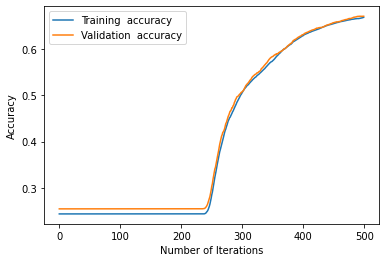

In [134]:
# plt.figure(figsize=(12,12))
# plt.plot(range(len(model.accuracy_history)), model.accuracy_history, label = "Training  accuracy" )
# plt.plot(range(len(model.valid_accuracy_history)), model.valid_accuracy_history, label = "Validation  accuracy" )
plt.plot(range(500), model.accuracy_history[:500], label = "Training  accuracy" )
plt.plot(range(500), model.valid_accuracy_history[:500], label = "Validation  accuracy" )

plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig("2a_acc_l1.png")
plt.show()

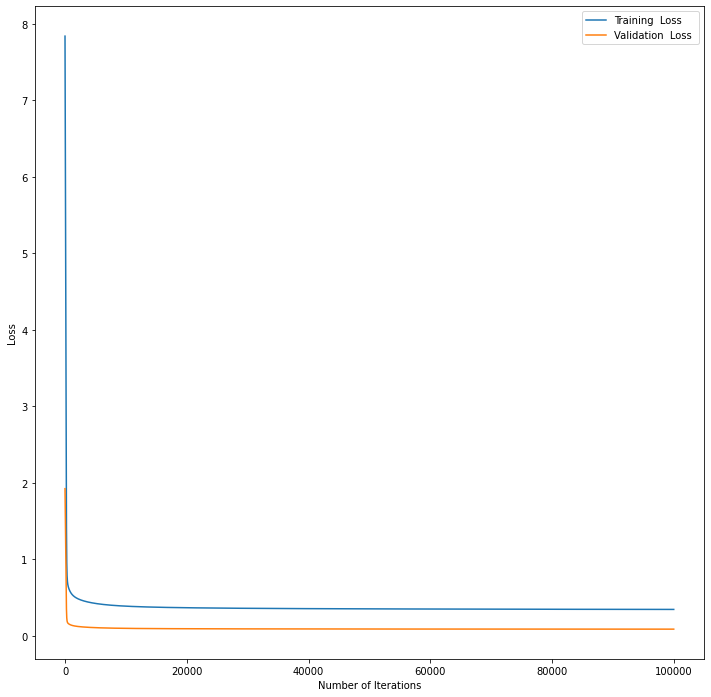

In [128]:
plt.figure(figsize=(12,12))
plt.plot(range(len(model.loss_history)), model.loss_history, label = "Training  Loss " )
plt.plot(range(len(model.valid_loss_history)), model.valid_loss_history, label = "Validation  Loss " )
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig("2a_loss_l1.png")
# plt.show()

In [84]:
model2 = LogisticRegression(n_iter=100000,l_rate=0.01,regularization = "L2" ,reg_lambda = 0.05)
model2.fit(np.array(X_train),np.array(Y_train),np.array(X_valid),np.array(Y_valid))

Iteration :  0 L2
0.24878776575904513 7.785962934230769
Iteration :  1 L2
0.24878776575904513 7.7571834065077105
Iteration :  2 L2
0.24878776575904513 7.728400380740704
Iteration :  3 L2
0.24878776575904513 7.699613998874591
Iteration :  4 L2
0.24878776575904513 7.670824397680109
Iteration :  5 L2
0.24878776575904513 7.642031708964648
Iteration :  6 L2
0.24878776575904513 7.613236059775917
Iteration :  7 L2
0.24878776575904513 7.584437572597965
Iteration :  8 L2
0.24878776575904513 7.555636365540761
Iteration :  9 L2
0.24878776575904513 7.526832552522844
Iteration :  10 L2
0.24878776575904513 7.498026243447905
Iteration :  11 L2
0.24878776575904513 7.469217544375116
Iteration :  12 L2
0.24878776575904513 7.440406557683707
Iteration :  13 L2
0.24878776575904513 7.411593382231918
Iteration :  14 L2
0.24878776575904513 7.382778113510453
Iteration :  15 L2
0.24878776575904513 7.353960843791136
Iteration :  16 L2
0.24878776575904513 7.325141662270329
Iteration :  17 L2
0.24878776575904513 7

In [77]:
predict_train = model2.predict(X_train)
my_accuracy_score(Y_train,predict_train)

0.838285880061337

In [78]:
predict_valid = model2.predict(X_valid)
my_accuracy_score(Y_valid,predict_valid)

0.8357367810376264

In [79]:
predict_test = model2.predict(X_test)
my_accuracy_score(Y_test,predict_test)

0.8376494023904383

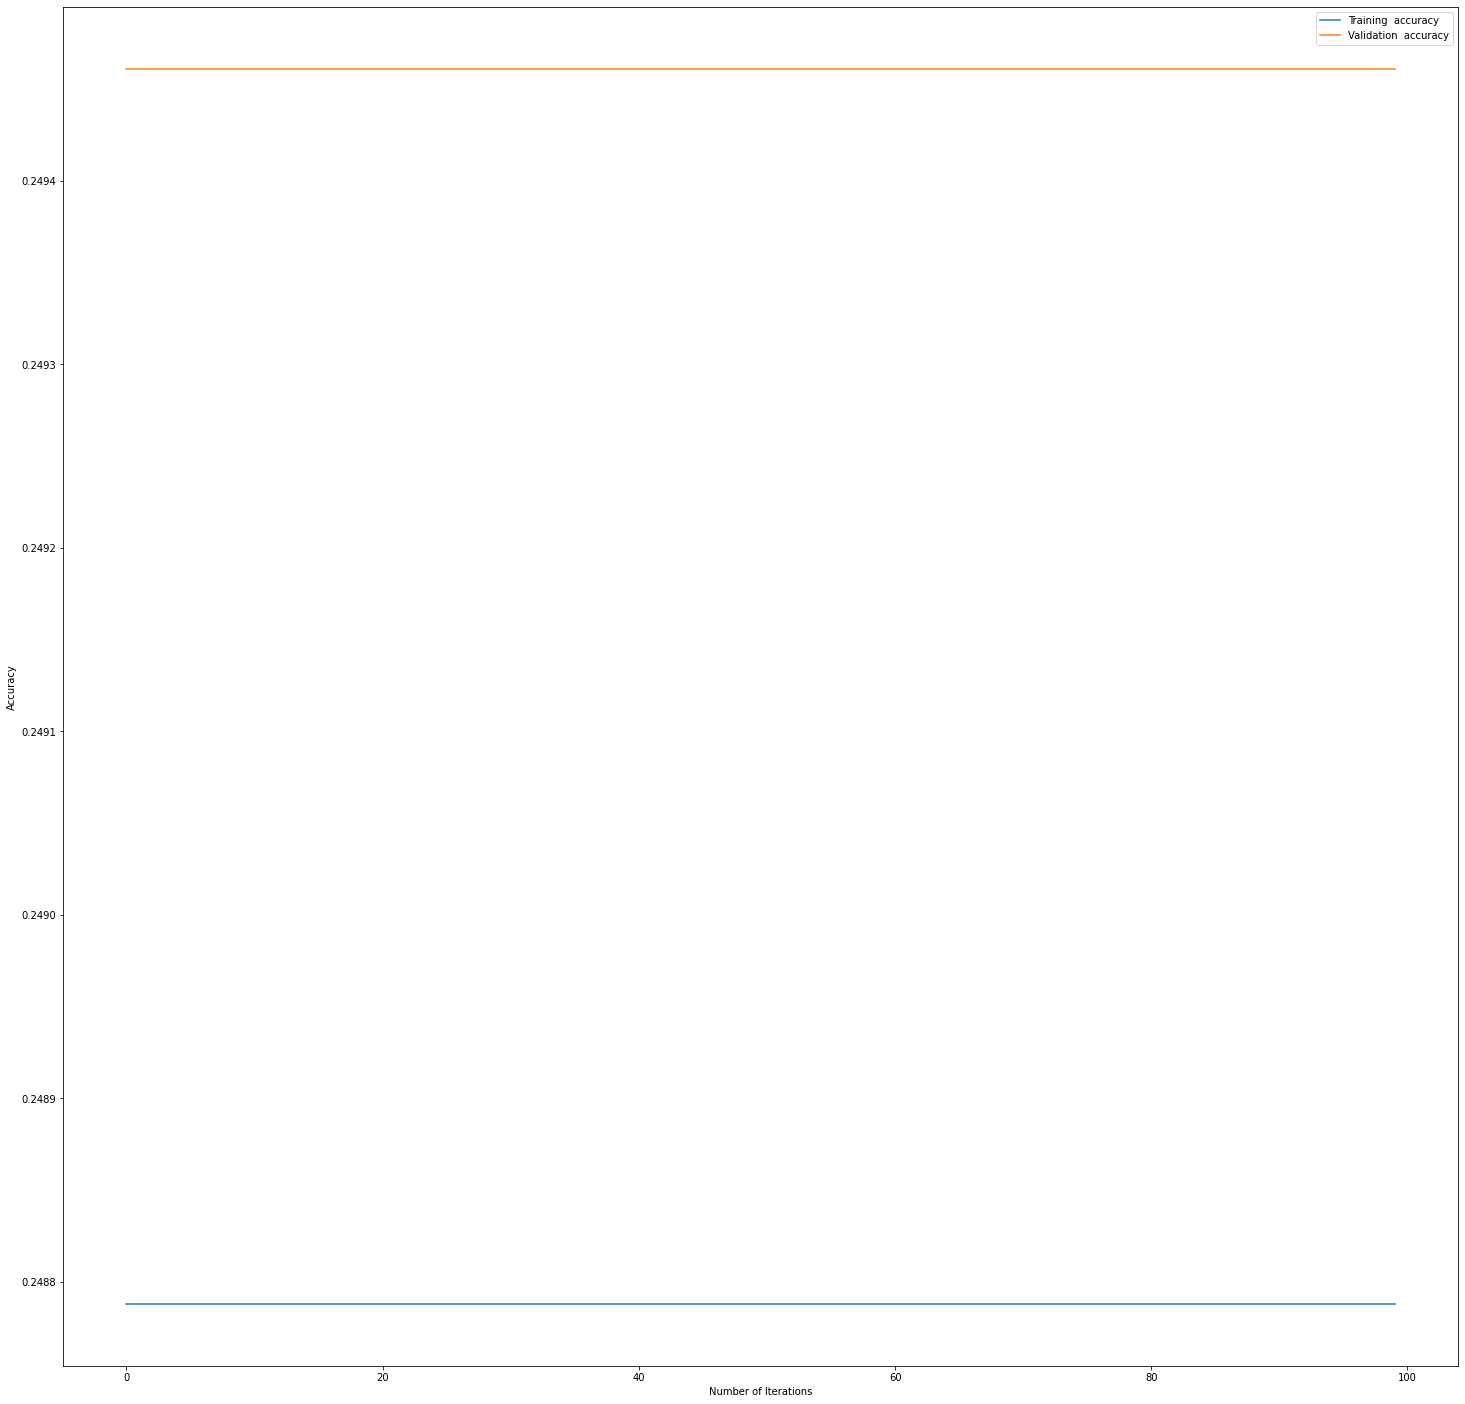

In [85]:
plt.figure(figsize=(25,25))
plt.plot(range(len(model2.accuracy_history)), model2.accuracy_history, label = "Training  accuracy" )
plt.plot(range(len(model2.valid_accuracy_history)), model2.valid_accuracy_history, label = "Validation  accuracy" )
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("2a_acc_l2.png")
plt.show()


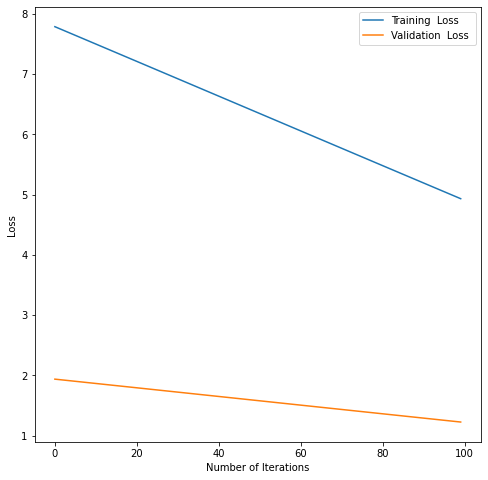

In [86]:
plt.figure(figsize=(8,8))
plt.plot(range(len(model2.loss_history)), model2.loss_history, label = "Training  Loss " )
plt.plot(range(len(model2.valid_loss_history)), model2.valid_loss_history, label = "Validation  Loss " )
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig("2a_loss_l2.png")
# plt.show()

In [91]:
for i in range(model.wt.shape[0]):
    print(model.wt[i],model2.wt[i])

[0.92488237] [0.24916359]
[0.9981185] [0.98119148]
[0.99523412] [0.95235543]
[0.94222168] [0.42250044]
[0.99844176] [0.98442467]
[0.99403644] [0.94038353]
[0.99687523] [0.96876171]
[0.99995437] [0.99954384]
[0.99748445] [0.9748549]
[0.99664319] [0.9664467]
[0.99883544] [0.98835914]
[0.99952338] [0.99523514]
[0.9990468] [0.9904707]
[0.99822625] [0.98226863]
[0.99857436] [0.98574888]
[0.99748442] [0.97485338]
[0.99680892] [0.96810211]
[0.99021553] [0.90220203]
[0.99968501] [0.99685211]
[0.9728223] [0.72835211]
[0.99764193] [0.97643074]
[0.99984663] [0.99846672]
[0.99953168] [0.99532007]
[0.98251146] [0.82519399]
[0.98766672] [0.87670607]
[0.99997509] [0.99975114]
[0.97428967] [0.74304816]
[0.99888516] [0.98885431]
[0.96938261] [0.69395888]
[0.99719017] [0.9719095]
[0.99749269] [0.97493304]
[0.98948196] [0.89486097]
[0.99997095] [0.99970958]
[0.98961462] [0.89619865]
[0.99308337] [0.93087199]
[0.99709072] [0.97091759]
[0.99574802] [0.9574994]
[0.99423952] [0.94242023]
[0.98977622] [0.8978

In [92]:
model.wt

array([[0.92488237],
       [0.9981185 ],
       [0.99523412],
       [0.94222168],
       [0.99844176],
       [0.99403644],
       [0.99687523],
       [0.99995437],
       [0.99748445],
       [0.99664319],
       [0.99883544],
       [0.99952338],
       [0.9990468 ],
       [0.99822625],
       [0.99857436],
       [0.99748442],
       [0.99680892],
       [0.99021553],
       [0.99968501],
       [0.9728223 ],
       [0.99764193],
       [0.99984663],
       [0.99953168],
       [0.98251146],
       [0.98766672],
       [0.99997509],
       [0.97428967],
       [0.99888516],
       [0.96938261],
       [0.99719017],
       [0.99749269],
       [0.98948196],
       [0.99997095],
       [0.98961462],
       [0.99308337],
       [0.99709072],
       [0.99574802],
       [0.99423952],
       [0.98977622],
       [0.99953166],
       [0.99259846],
       [0.99859923],
       [0.99126817],
       [0.99795688],
       [0.99592207],
       [0.9771947 ],
       [0.97724816],
       [0.997